# quiz 2

# 1.transfer function of 2bit, 2.5bit with and without redundancy

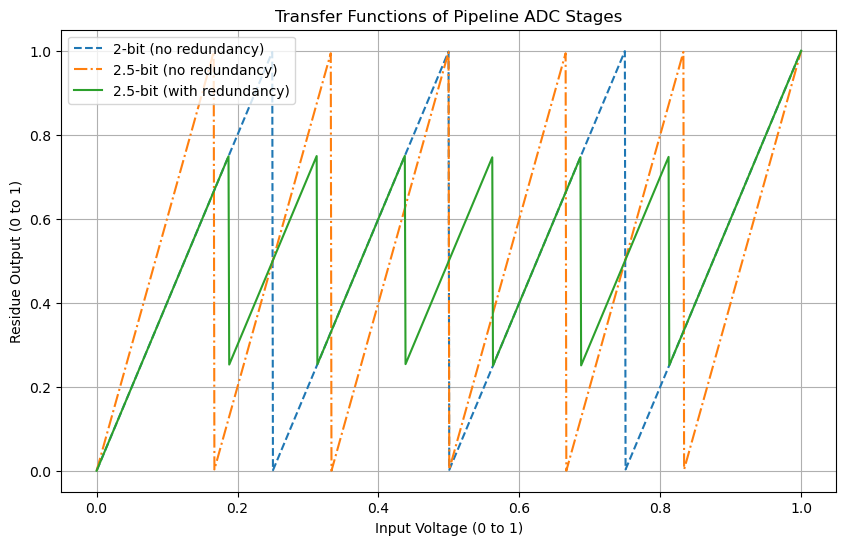

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def stage_2bit(x, vref=1.0):
    """Ideal 2-bit stage (no redundancy), 4-level quantizer"""
    q = vref / 4
    d = np.floor(x / q)
    d = np.clip(d, 0, 3)
    return 4 * (x - d * q)

def stage_2p5bit_noredundancy(x, vref=1.0):
    """2.5-bit stage without redundancy, ideal 5-level quantizer"""
    q = vref / 6
    d = np.floor(x / q)
    d = np.clip(d, 0, 5)
    return 6 * (x - d * q)

def stage_2p5bit_with_redundancy(x, vref=1.0):
    """2.5-bit stage with redundancy (7 levels with overlap)"""
    q = vref / 8
    
    thresholds = np.array([0.0, 0.1875, 0.3125, 0.4375, 0.5625, 0.6875, 0.8125, 1])
    d = np.digitize(x, thresholds) - 1
    d = np.clip(d, 0, 6)
    return 4 * (x - d * q)  


x = np.linspace(0, 1, 1000)

# Compute transfer functions
y_2bit = stage_2bit(x)
y_2p5_no_red = stage_2p5bit_noredundancy(x)
y_2p5_with_red = stage_2p5bit_with_redundancy(x)


plt.figure(figsize=(10, 6))
plt.plot(x, y_2bit, label='2-bit (no redundancy)', linestyle='--')
plt.plot(x, y_2p5_no_red, label='2.5-bit (no redundancy)', linestyle='-.')
plt.plot(x, y_2p5_with_red, label='2.5-bit (with redundancy)', linestyle='-')
plt.xlabel('Input Voltage (0 to 1)')
plt.ylabel('Residue Output (0 to 1)')
plt.title('Transfer Functions of Pipeline ADC Stages')
plt.grid(True)
plt.legend()
plt.show()


# 2. input to 2bit

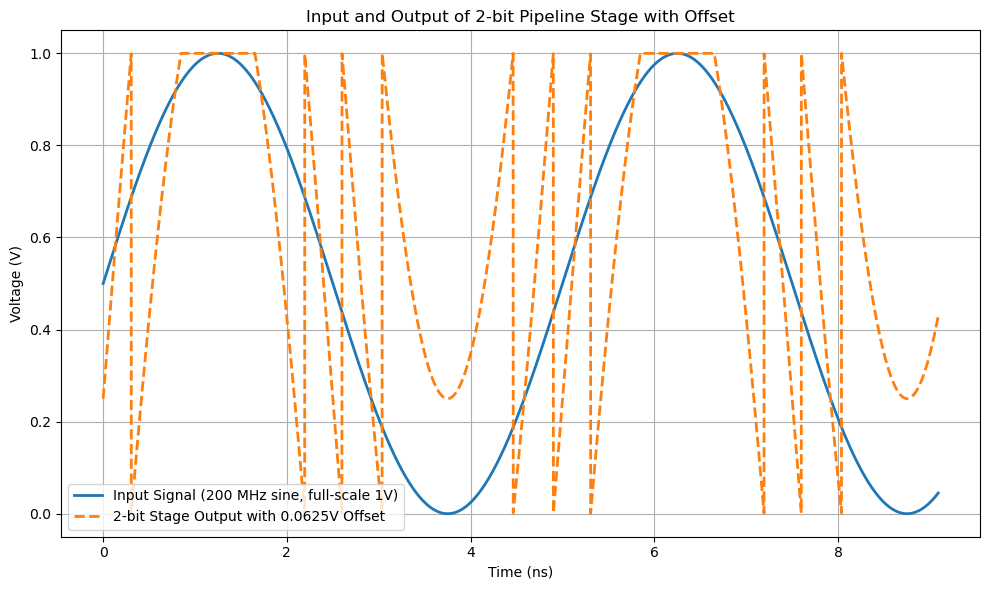

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def stage_2bit(x, vref=1.0):
    q = vref / 4
    d = np.floor(x / q)
    d = np.clip(d, 0, 3)
    return 4 * (x - d * q)

def stage_2bit_offset(x, vref=1.0, offset=0.0625):
    return np.clip(stage_2bit(x + offset, vref) , 0,1) 


fs = 100e9              
f_in = 200e6          
N = 10000              
t = np.arange(N) / (11*fs) 


vin = 0.5 + 0.5 * np.sin(2 * np.pi * f_in * t)


vout = stage_2bit_offset(vin)


plt.figure(figsize=(10, 6))
plt.plot(t * 1e9, vin, label='Input Signal (200 MHz sine, full-scale 1V)', linewidth=2)
plt.plot(t * 1e9, vout, label='2-bit Stage Output with 0.0625V Offset', linewidth=2, linestyle='--')
plt.xlabel('Time (ns)')
plt.ylabel('Voltage (V)')
plt.title('Input and Output of 2-bit Pipeline Stage with Offset')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 2. 2bit snr

SNR = -11.88 dB


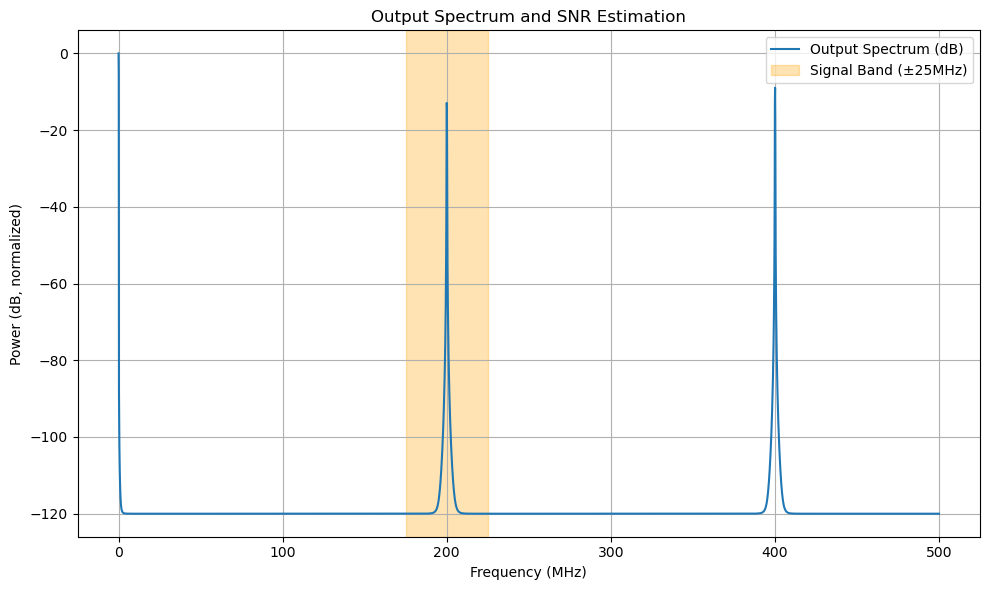

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def stage_2bit(x, vref=1.0):
    q = vref / 4
    d = np.floor(x / q)
    d = np.clip(d, 0, 3)
    return 4 * (x - d * q)

def stage_2bit_offset(x, vref=1.0, offset=0.0625):
    return np.clip(stage_2bit(x + offset, vref) , 0,1)


fs = 1e9              
f_in = 200e6          
N = 8192              
t = np.arange(N) / fs


vin = 0.5 + 0.45 * np.sin(2 * np.pi * f_in * t)


vout = stage_2bit_offset(vin)


Vf = np.fft.fft(vout * np.hanning(N))  
Vf = np.abs(Vf[:N//2])**2              
freq = np.fft.fftfreq(N, d=1/fs)[:N//2]


Vf /= np.max(Vf)


signal_band = (freq >= 175e6) & (freq <= 225e6)
P_signal = np.sum(Vf[signal_band])
P_noise = np.sum(Vf[~signal_band])
SNR_dB = 10 * np.log10(P_signal / P_noise)
print(f"SNR = {SNR_dB:.2f} dB")


plt.figure(figsize=(10, 6))
plt.plot(freq * 1e-6, 10 * np.log10(Vf + 1e-12), label='Output Spectrum (dB)', linewidth=1.5)
plt.axvspan(175, 225, color='orange', alpha=0.3, label='Signal Band (±25MHz)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dB, normalized)')
plt.title('Output Spectrum and SNR Estimation')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# 3 2.5bit without redundancy

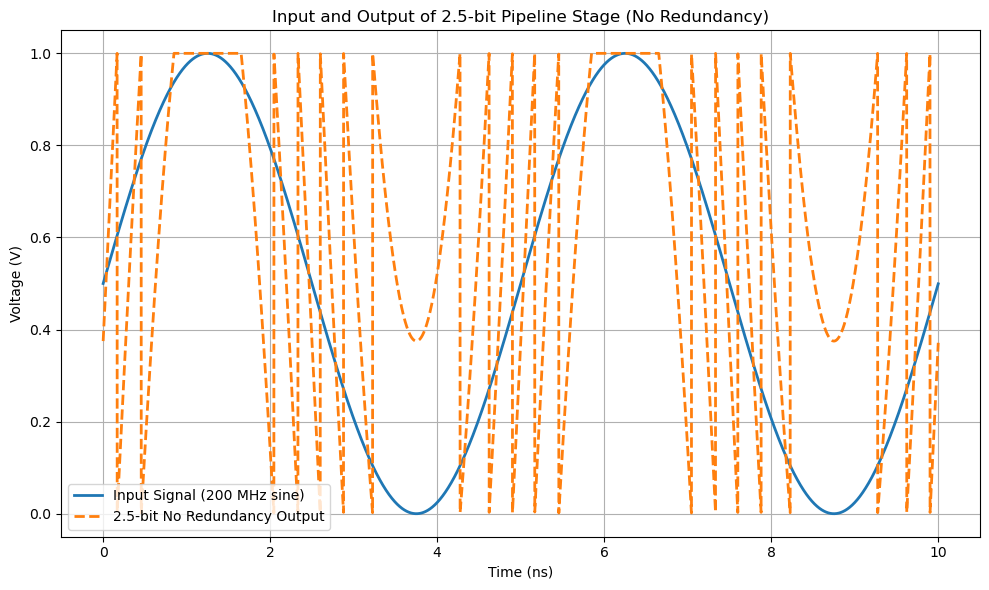

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def stage_2p5bit_noredundancy(x, vref=1.0):
    q = vref / 6
    d = np.floor(x / q)
    d = np.clip(d, 0, 5)
    return 6 * (x - d * q)


fs = 1000e9            
f_in = 200e6          
N = 10000            
t = np.arange(N) / fs


vin = 0.5 + 0.5 * np.sin(2 * np.pi * f_in * t)


vout = np.clip(stage_2p5bit_noredundancy(vin+0.0625),0,1)


plt.figure(figsize=(10, 6))
plt.plot(t * 1e9, vin, label='Input Signal (200 MHz sine)', linewidth=2)
plt.plot(t * 1e9, vout, label='2.5-bit No Redundancy Output', linewidth=2, linestyle='--')
plt.xlabel('Time (ns)')
plt.ylabel('Voltage (V)')
plt.title('Input and Output of 2.5-bit Pipeline Stage (No Redundancy)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 3.1 2.5bit snr without redundancy

SNR for 2.5-bit (no redundancy): -16.24 dB


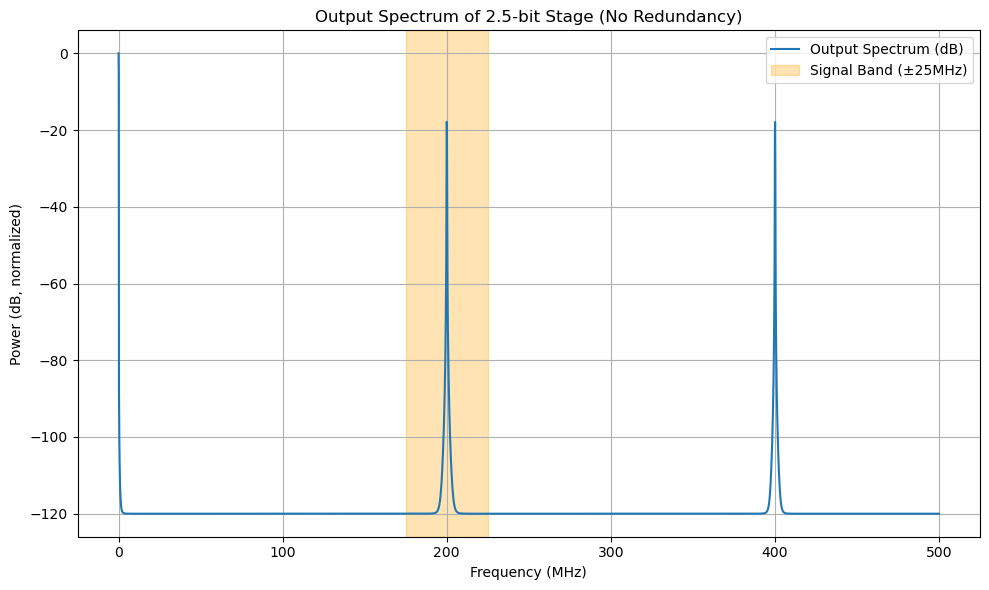

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def stage_2p5bit_noredundancy(x, vref=1.0):
    q = vref / 6
    d = np.floor(x / q)
    d = np.clip(d, 0, 5)
    return 6 * (x - d * q)


fs = 1e9             
f_in = 200e6          
N = 8192            
t = np.arange(N) / fs


vin = 0.5 + 0.45 * np.sin(2 * np.pi * f_in * t)


vout = np.clip(stage_2p5bit_noredundancy(vin+0.0625),0,1)


window = np.hanning(N)
Vf = np.fft.fft(vout * window)
Vf = np.abs(Vf[:N//2])**2
freq = np.fft.fftfreq(N, 1/fs)[:N//2]


Vf /= np.max(Vf)


signal_band = (freq >= 175e6) & (freq <= 225e6)
P_signal = np.sum(Vf[signal_band])
P_noise = np.sum(Vf[~signal_band])
SNR_dB = 10 * np.log10(P_signal / P_noise)

print(f"SNR for 2.5-bit (no redundancy): {SNR_dB:.2f} dB")


plt.figure(figsize=(10, 6))
plt.plot(freq * 1e-6, 10 * np.log10(Vf + 1e-12), label='Output Spectrum (dB)', linewidth=1.5)
plt.axvspan(175, 225, color='orange', alpha=0.3, label='Signal Band (±25MHz)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dB, normalized)')
plt.title('Output Spectrum of 2.5-bit Stage (No Redundancy)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# 4. 2.5bit with redundancy 

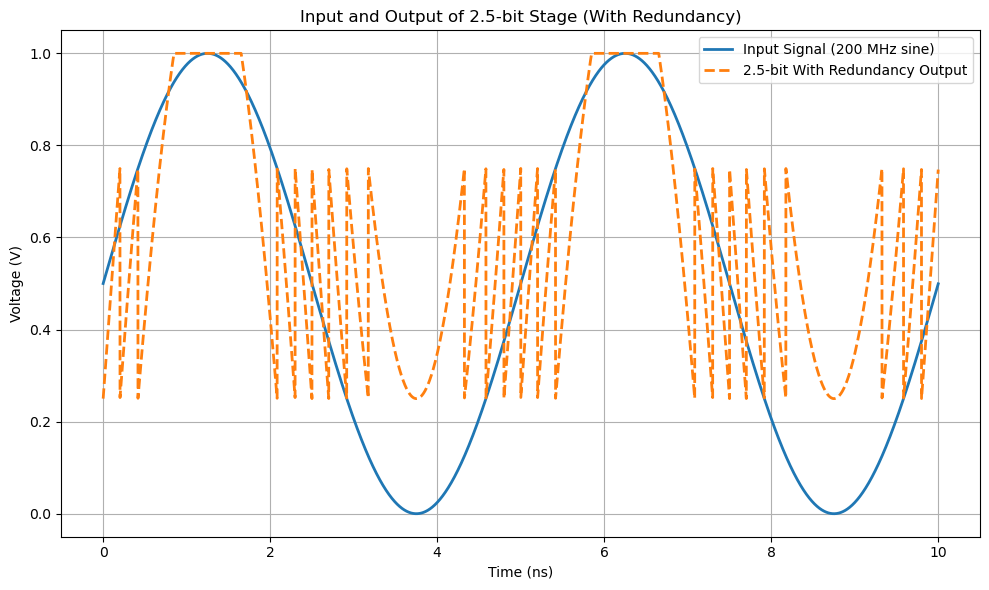

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



def stage_2p5bit_with_redundancy(x, vref=1.0):
    q = vref / 8
    thresholds = np.array([0.0, 0.1875, 0.3125, 0.4375, 0.5625, 0.6875, 0.8125, 1.0])
    d = np.digitize(x, thresholds) - 1
    d = np.clip(d, 0, 6)
    return 4 * (x - d * q)


fs = 1000e9            
f_in = 200e6          
N = 10000            
t = np.arange(N) / fs


vin = 0.5 + 0.5 * np.sin(2 * np.pi * f_in * t)


vout = np.clip(stage_2p5bit_with_redundancy(vin+0.0625),0,1)


plt.figure(figsize=(10, 6))
plt.plot(t * 1e9, vin, label='Input Signal (200 MHz sine)', linewidth=2)
plt.plot(t * 1e9, vout, label='2.5-bit With Redundancy Output', linestyle='--', linewidth=2)
plt.xlabel('Time (ns)')
plt.ylabel('Voltage (V)')
plt.title('Input and Output of 2.5-bit Stage (With Redundancy)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 4. 2.5 bit with redundancy snr

SNR for 2.5-bit (with redundancy): -20.14 dB


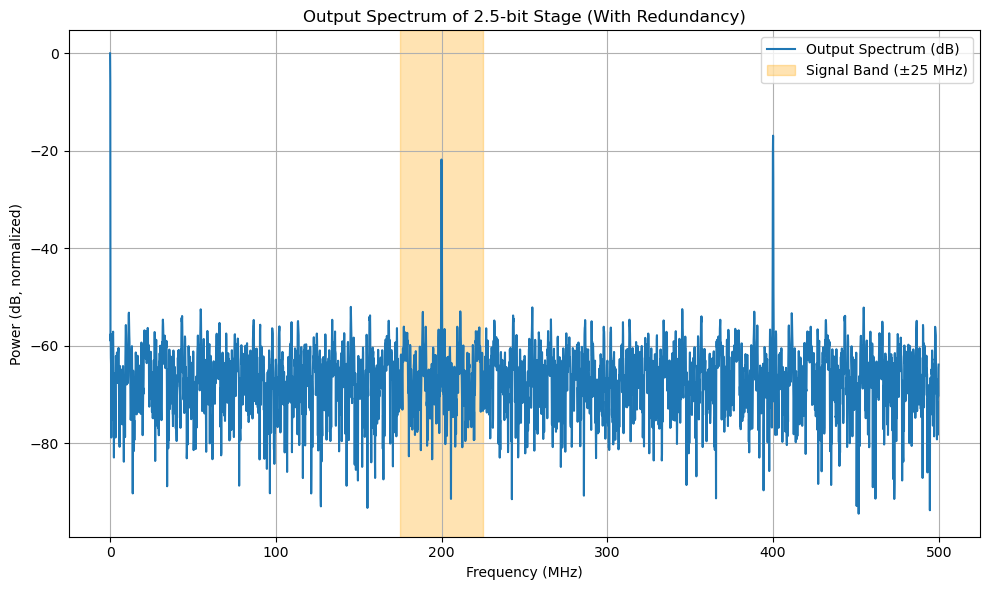

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def stage_2p5bit_with_redundancy(x, vref=1.0):
    q = vref / 8
    thresholds = np.array([0.0, 0.1875, 0.3125, 0.4375, 0.5625, 0.6875, 0.8125, 1.0])
    d = np.digitize(x, thresholds) - 1
    d = np.clip(d, 0, 6)
    return 6 * (x - d * q)


fs = 1e9          
f_in = 200e6       
N = 8192             
t = np.arange(N) / fs


vin = 0.5 + 0.45 * np.sin(2 * np.pi * f_in * t)


vout = np.clip(stage_2p5bit_with_redundancy(vin+0.0625),0,1)


window = np.hanning(N)
Vf = np.fft.fft(vout * window)
Vf = np.abs(Vf[:N//2])**2
freq = np.fft.fftfreq(N, 1/fs)[:N//2]


Vf /= np.max(Vf)


signal_band = (freq >= 175e6) & (freq <= 225e6)
P_signal = np.sum(Vf[signal_band])
P_noise = np.sum(Vf[~signal_band])
SNR_dB = 10 * np.log10(P_signal / P_noise)

print(f"SNR for 2.5-bit (with redundancy): {SNR_dB:.2f} dB")


plt.figure(figsize=(10, 6))
plt.plot(freq * 1e-6, 10 * np.log10(Vf + 1e-12), label='Output Spectrum (dB)', linewidth=1.5)
plt.axvspan(175, 225, color='orange', alpha=0.3, label='Signal Band (±25 MHz)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dB, normalized)')
plt.title('Output Spectrum of 2.5-bit Stage (With Redundancy)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
